In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd
import gzip
import scipy


In [2]:
v2R_df = pd.read_csv('v2R_all_exp_all_reps_com_and_norm.csv.gz', sep=',', index_col=0)

In [3]:
v2R_df['min_cells'] = v2R_df[['37_cells_count', 'DMSOA_cells_count', 'DMSOB_cells_count','DMSOC_cells_count']].min(axis=1)
print (len(v2R_df))
v2R_df_over50 = v2R_df.loc[v2R_df['min_cells'] > 50].copy()
print (len(v2R_df_over50))

7791
6844


In [4]:
ctrl_reps = v2R_df_over50[['DMSOA_norm_score', 'DMSOB_norm_score', 'DMSOC_norm_score', '37_norm_score']]

(0.9061160439069039, 0.0)
(0.8888295103114757, 0.0)
(0.8787095462059299, 0.0)
(0.9123296993263391, 0.0)
(0.9082126669290594, 0.0)
(0.8970606090545874, 0.0)


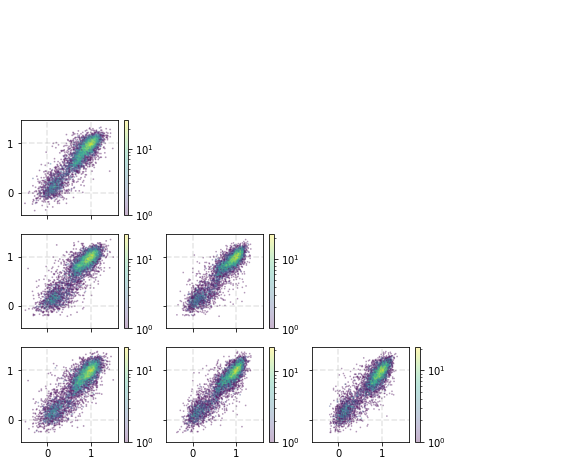

In [5]:
fig, axs = plt.subplots(4, 4, figsize=(10, 8), sharex=True, sharey=True)

ydim = 0

for rep_name1 in ['DMSOA_norm_score', 'DMSOB_norm_score', 'DMSOC_norm_score', '37_norm_score']:
    xdim = 0
    for rep_name2 in ['DMSOA_norm_score', 'DMSOB_norm_score', 'DMSOC_norm_score', '37_norm_score']:
        if (xdim, ydim) in [(0, 3), (0, 2), (0, 1),(0, 0),(1, 3),(1, 2),(1, 1),(2, 3),(2, 2), (3, 3)]:
            axs[xdim, ydim].axis('off')
            #pass
        else:
            print (scipy.stats.pearsonr(v2R_df_over50[rep_name1], v2R_df_over50[rep_name2]))
            
            #axs[xdim, ydim].hexbin(v2R_df_over50[rep_name1], v2R_df_over50[rep_name2], bins='log', alpha=0.3)
            c = axs[xdim, ydim].hexbin(v2R_df_over50[rep_name1], v2R_df_over50[rep_name2], bins='log', alpha=0.3)
            axs[xdim, ydim].axhline(y = 0, linestyle='dashed', color='gray', alpha=0.2)
            axs[xdim, ydim].axhline(y = 1, linestyle='dashed', color='gray', alpha=0.2)
            axs[xdim, ydim].axvline(x = 0, linestyle='dashed', color='gray', alpha=0.2)
            axs[xdim, ydim].axvline(x = 1, linestyle='dashed', color='gray', alpha=0.2)
            axs[xdim, ydim].set_yticks([0, 1])
            axs[xdim, ydim].set_xticks([0, 1])
            cb = fig.colorbar(c, ax = axs[xdim, ydim])
            #axs[xdim, ydim].set_xlabel(rep_name1)
            #axs[xdim, ydim].set_ylabel(rep_name2)
        #axs[xdim].set_title('cell_counts= '+str(cell_counts), size=8)
        xdim+=1
    ydim+=1

In [6]:
print (np.percentile(v2R_df_over50.loc[(v2R_df_over50['stop'] == True) & (v2R_df_over50['pos'] < 300)]['ctrls_comb'], 95))
print (np.percentile(v2R_df_over50.loc[(v2R_df_over50['syn_WT'] == True)]['ctrls_comb'], 5))

0.3491023229761244
0.8252533555328904


In [7]:
print (len(v2R_df_over50.loc[(v2R_df_over50['syn_WT'] == False) & (v2R_df_over50['stop'] == False) & (v2R_df_over50['ctrls_comb'] > 0.825)]))
           
print (len(v2R_df_over50.loc[(v2R_df_over50['syn_WT'] == False) & (v2R_df_over50['stop'] == False) & \
                             (v2R_df_over50['ctrls_comb'] <= 0.825) & (v2R_df_over50['ctrls_comb'] > 0.35)]))

print (len(v2R_df_over50.loc[(v2R_df_over50['syn_WT'] == False) & (v2R_df_over50['stop'] == False) & \
                             (v2R_df_over50['ctrls_comb'] < 0.35)]))  

3415
1772
1025


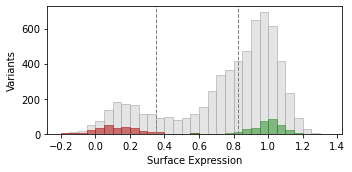

In [8]:
plt.figure(figsize=(5, 2.5))
plt.hist(v2R_df_over50.loc[(v2R_df_over50['syn_WT'] == False) & (v2R_df_over50['stop'] == False)]['ctrls_comb'], color='lightgray', bins=np.arange(-0.2, 1.4, 0.05), edgecolor='darkgrey', alpha=0.6)
plt.hist(v2R_df_over50.loc[(v2R_df_over50['stop'] == True) & (v2R_df_over50['pos'] < 300)]['ctrls_comb'], color='firebrick', bins=np.arange(-0.2, 1.4, 0.05), edgecolor='firebrick', alpha=0.6)
plt.hist(v2R_df_over50.loc[v2R_df_over50['syn_WT'] == True]['ctrls_comb'], color='forestgreen', bins=np.arange(-0.2, 1.4, 0.05), edgecolor='forestgreen', alpha=0.5)

plt.axvline(x = 0.35, color='gray', linestyle='dashed', linewidth = 1)
plt.axvline(x = 0.825, color='gray', linestyle='dashed', linewidth = 1)

plt.xlabel('Surface Expression')
plt.ylabel('Variants')
plt.tight_layout()

In [9]:
aas = ['A', 'V', 'I', 'L', 'M', 'F', 'Y', 'W', 'S', 'T', 'N', 'Q', 'C', 'G', 'P', 'R', 'H', 'K', 'D', 'E', '*']
v2R_aa_seq = 'MLMASTTSAVPGHPSLPSLPSNSSQERPLDTRDPLLARAELALLSIVFVAVALSNGLVLAALARRGRRGHWAPIHVFIGHLCLADLAVALFQVLPQLAWKATDRFRGPDALCRAVKYLQMVGMYASSYMILAMTLDRHRAICRPMLAYRHGSGAHWNRPVLVAWAFSLLLSLPQLFIFAQRNVEGGSGVTDCWACFAEPWGRRTYVTWIALMVFVAPTLGIAACQVLIFREIHASLVPGPSERPGGRRRGRRTGSPGEGAHVSAAVAKTVRMTLVIVVVYVLCWAPFFLVQLWAAWDPEAPLEGAPFVLLMLLASLNSCTNPWIYASFSSSVSSELRSLLCCARGRTPPSLGPQDESCTTASSSLAKDTSS'
poss = list(range(1, (len(v2R_aa_seq)+1)))
ordered_vars = []
for pos in poss:
    for aa in aas:
        ordered_vars.append(v2R_aa_seq[pos-1]+str(pos)+ aa)

In [10]:
over50_dict = v2R_df_over50['ctrls_comb'].to_dict()
ordered_vals = []
for var in ordered_vars:
    if var in over50_dict:
        ordered_vals.append(over50_dict[var])
    else:
        ordered_vals.append(np.nan)

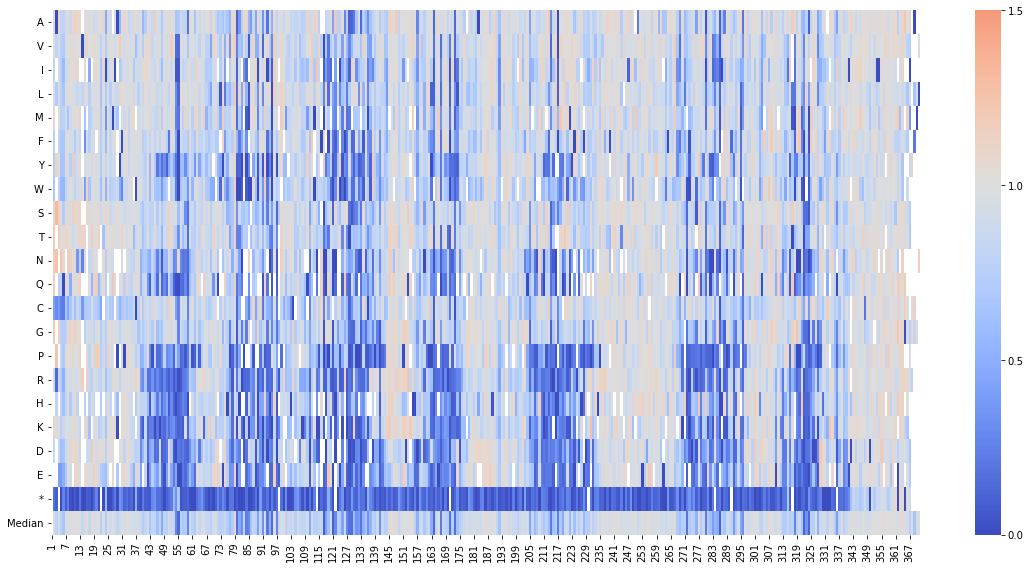

In [11]:
v2R_controls_re = np.reshape(list(v2R_df['ctrls_comb']), (len(v2R_aa_seq), 21))
v2R_controls_heatmap = pd.DataFrame(v2R_controls_re, columns=aas, index=np.arange(1,len(v2R_aa_seq)+1)).T
v2R_controls_heatmap.loc['Median'] = v2R_controls_heatmap.drop(['*']).median()

ticks = [0, 0.5, 1, 1.5]

plt.figure(figsize=(16, 8))
sns.heatmap(v2R_controls_heatmap, cmap='coolwarm', center=1, vmin = 0, vmax=1.5, cbar_kws={'ticks': ticks})
plt.tight_layout()
#plt.savefig('fig1/v2R_ctrls_heatmap.png', dpi=300)

In [12]:
medians_dict = v2R_controls_heatmap.loc['Median'].to_dict()
medians_list = list(v2R_controls_heatmap.loc['Median'])

In [13]:
v2R_df_over50_missense = v2R_df_over50.loc[(v2R_df_over50['stop'] == False) & (v2R_df_over50['syn_WT'] == False)].copy()

In [14]:
medians_list = []
for pos in np.arange(1, 372):
    test_df = v2R_df_over50_missense.loc[v2R_df_over50_missense['pos'] == pos]
    if len(test_df) > 10:
        medians_list.append(np.median(test_df['ctrls_comb']))
        
TM_medians_list = []
for pos in np.arange(1, 372):
    if pos in list(v2R_df_over50_missense.loc[v2R_df_over50_missense['Transmembrane'] == True].pos):
        test_df = v2R_df_over50_missense.loc[v2R_df_over50_missense['pos'] == pos]
        if len(test_df) > 10:
            TM_medians_list.append(np.median(test_df['ctrls_comb']))

/Users/tmighell/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/Users/tmighell/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


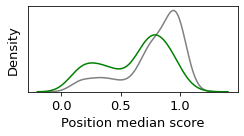

In [17]:
plt.figure(figsize=(3.5, 2))
#plt.hist(hydro_corr_list, color='lightgray', edgecolor='k', bins=16)
sns.distplot(medians_list, hist=False, color='gray')
sns.distplot(TM_medians_list, hist=False, color='green')

plt.xlabel('Position median score', fontsize=13)
plt.ylabel('Density', fontsize=13)
plt.xticks([0, 0.5, 1], fontsize=13)
plt.yticks([], fontsize=13)
plt.tight_layout()

In [18]:
TMs = ['TM1','TM2', 'TM3', 'TM4', 'TM5', 'TM6', 'TM7']
ECLs = ['Nterm', 'ECL1', 'ECL2', 'ECL3']
ICLs = ['ICL1', 'ICL2', 'ICL3', 'Cterm']


TM_scores = v2R_df_over50_missense.loc[v2R_df_over50_missense['topo'].isin(TMs)]['ctrls_comb']
ECL_scores = v2R_df_over50_missense.loc[v2R_df_over50_missense['topo'].isin(ECLs)]['ctrls_comb']
ICL_scores = v2R_df_over50_missense.loc[v2R_df_over50_missense['topo'].isin(ICLs)]['ctrls_comb']


In [19]:
topo_df = pd.DataFrame({'Transmembrane': pd.Series(list(TM_scores)), \
            'Extracellular': pd.Series(list(ECL_scores)), \
            'Intracellular': pd.Series(list(ICL_scores))})

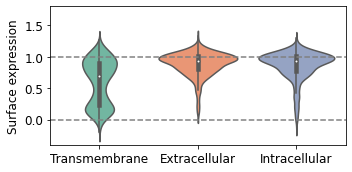

In [20]:
plt.figure(figsize=(5, 2.5))
sns.violinplot(data = topo_df, palette = 'Set2')
plt.ylim(-0.4, 1.8)
plt.axhline(y = 1, linestyle='dashed', color='gray')
plt.axhline(y = 0, linestyle='dashed', color='gray')
plt.ylabel('Surface expression', fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()

In [21]:
Nterm = v2R_df_over50_missense.loc[(v2R_df_over50_missense['pos'] < 39)]

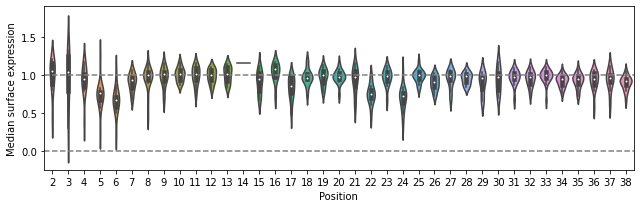

In [22]:
plt.figure(figsize=(9, 3))
sns.violinplot(data = Nterm, x = 'pos', y='ctrls_comb')

plt.axhline(y = 1, linestyle='dashed', color='gray')
plt.axhline(y = 0, linestyle='dashed', color='gray')
#sns.stripplot(data = Nterm, x = 'pos', y='ctrls_comb')
plt.xlabel('Position')
plt.ylabel('Median surface expression')
plt.ylim(-0.25, 1.9)
plt.tight_layout()


In [23]:
palm_sites = v2R_df_over50_missense.loc[v2R_df_over50_missense['pos'].isin([341, 342])]

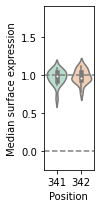

In [24]:
plt.figure(figsize=(1.5, 3))
sns.violinplot(data = palm_sites, x = 'pos', y='ctrls_comb', palette='Pastel2')

plt.axhline(y = 1, linestyle='dashed', color='gray')
plt.axhline(y = 0, linestyle='dashed', color='gray')
plt.ylim(-0.25, 1.9)

#sns.stripplot(data = Nterm, x = 'pos', y='ctrls_comb')
plt.xlabel('Position')
plt.ylabel('Median surface expression')
plt.tight_layout()

#plt.savefig('fig1/palm_violinplots_shorter.png', dpi=300)

In [26]:
ECL_C_scores = v2R_df_over50_missense.loc[(v2R_df_over50_missense['topo'].isin(ECLs)) & (v2R_df_over50_missense['mut_aa'] == 'C')]['ctrls_comb']
ICL_C_scores = v2R_df_over50_missense.loc[(v2R_df_over50_missense['topo'].isin(ICLs)) & (v2R_df_over50_missense['mut_aa'] == 'C')]['ctrls_comb']

C_df = pd.DataFrame({'Extracellular': pd.Series(list(ECL_C_scores)), \
            'Intracellular': pd.Series(list(ICL_C_scores))})

MannwhitneyuResult(statistic=1832.0, pvalue=7.300893294659714e-10)


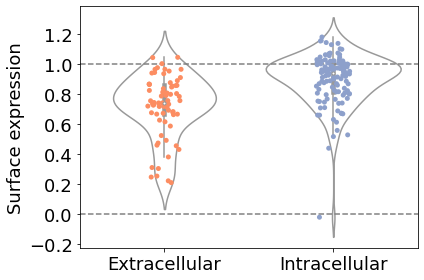

In [27]:
labels = ['Extracellular', 'Intracellular']
palette = (np.array(sns.color_palette("Set2"))[1:])
sns.stripplot(data = C_df, palette = palette)

sns.violinplot(data = C_df, color='white', labels=labels)
plt.axhline(y = 1, linestyle='dashed', color='gray')
plt.axhline(y = 0, linestyle='dashed', color='gray')
print (scipy.stats.mannwhitneyu(ECL_C_scores, ICL_C_scores))
plt.ylabel('Surface expression', fontsize=18)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.tight_layout()

In [28]:
TM_missense_df = v2R_df_over50_missense.loc[v2R_df_over50_missense['topo'].isin(TMs)].copy()


SpearmanrResult(correlation=0.19655375750926288, pvalue=3.807488933022716e-55)


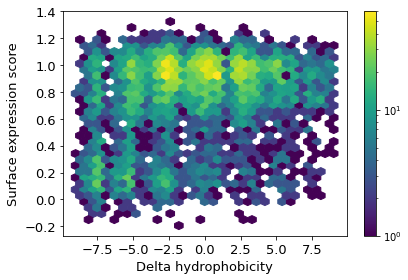

In [29]:
plt.hexbin(v2R_df_over50_missense['delta_hydro'], v2R_df_over50_missense['ctrls_comb'], bins='log',gridsize=30)

plt.xlabel('Delta hydrophobicity', fontsize=13)
plt.ylabel('Surface expression score', fontsize=13)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
print (scipy.stats.spearmanr(v2R_df_over50_missense['delta_hydro'], v2R_df_over50_missense['ctrls_comb']))

plt.colorbar()
plt.tight_layout()


SpearmanrResult(correlation=0.2802139692714581, pvalue=1.8015320922647466e-48)


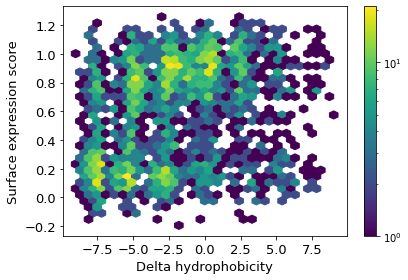

In [30]:
plt.hexbin(TM_missense_df['delta_hydro'], TM_missense_df['ctrls_comb'], bins='log', gridsize=30)
#plt.plot(v2R_ctrl_df_over50_missense.loc[v2R_ctrl_df_over50_missense['topo'].isin(TMs)]['delta_hydro'], v2R_ctrl_df_over50_missense.loc[v2R_ctrl_df_over50_missense['topo'].isin(TMs)]['ctrls_comb'], 'ko', alpha=0.3)

plt.xlabel('Delta hydrophobicity', fontsize=13)
plt.ylabel('Surface expression score', fontsize=13)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
print (scipy.stats.spearmanr(TM_missense_df['delta_hydro'], TM_missense_df['ctrls_comb']))
plt.colorbar()
plt.tight_layout()


SpearmanrResult(correlation=-0.050788130957979113, pvalue=0.0023283070624395634)


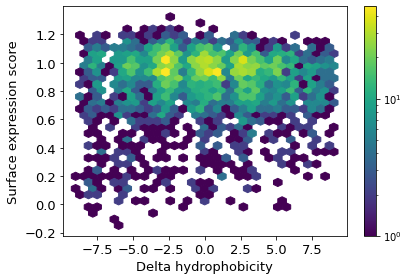

In [31]:
non_TM_missense_df = v2R_df_over50_missense.loc[v2R_df_over50_missense['topo'].isin(ECLs+ICLs)]


plt.hexbin(non_TM_missense_df['delta_hydro'], non_TM_missense_df['ctrls_comb'], bins='log', gridsize=30)
#plt.plot(v2R_ctrl_df_over50_missense.loc[v2R_ctrl_df_over50_missense['topo'].isin(TMs)]['delta_hydro'], v2R_ctrl_df_over50_missense.loc[v2R_ctrl_df_over50_missense['topo'].isin(TMs)]['ctrls_comb'], 'ko', alpha=0.3)

plt.xlabel('Delta hydrophobicity', fontsize=13)
plt.ylabel('Surface expression score', fontsize=13)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)

print (scipy.stats.spearmanr(non_TM_missense_df['delta_hydro'], non_TM_missense_df['ctrls_comb']))

plt.colorbar()
plt.tight_layout()


In [32]:
hydro_corr_dict = {}
hydro_corr_list = []
for pos in np.arange(1, 372):
    test_df = v2R_df_over50_missense.loc[v2R_df_over50_missense['pos'] == pos]
    if len(test_df) > 10:
        hydro_corr_dict[pos] = scipy.stats.spearmanr(test_df['delta_hydro'], test_df['ctrls_comb'])[0]
        hydro_corr_list.append(scipy.stats.spearmanr(test_df['delta_hydro'], test_df['ctrls_comb'])[0])
    else:
        hydro_corr_dict[pos] = 0
        hydro_corr_list.append(0)
        
TM_hydro_corr_list = []
for pos in np.arange(1, 372):
    if pos in list(v2R_df_over50_missense.loc[v2R_df_over50_missense['Transmembrane'] == True].pos):
        test_df = v2R_df_over50_missense.loc[v2R_df_over50_missense['pos'] == pos]
        if len(test_df) > 10:
            TM_hydro_corr_list.append(scipy.stats.spearmanr(test_df['delta_hydro'], test_df['ctrls_comb'])[0])
        else:
            TM_hydro_corr_list.append(0)

/Users/tmighell/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/Users/tmighell/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


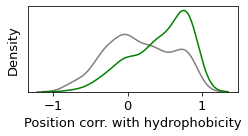

In [33]:
plt.figure(figsize=(3.5, 2))
#plt.hist(hydro_corr_list, color='lightgray', edgecolor='k', bins=16)
sns.distplot(hydro_corr_list, hist=False, color='gray')
sns.distplot(TM_hydro_corr_list, hist=False, color='green')

plt.xlabel('Position corr. with hydrophobicity', fontsize=13)
plt.ylabel('Density', fontsize=13)
plt.xticks([-1, 0, 1], fontsize=13)
plt.yticks([], fontsize=13)

plt.tight_layout()


In [35]:
Nterm_scores = v2R_df_over50_missense.loc[v2R_df_over50_missense['topo']== 'Nterm']['ctrls_comb']
TM1_scores = v2R_df_over50_missense.loc[v2R_df_over50_missense['topo']== 'TM1']['ctrls_comb']
ICL1_scores = v2R_df_over50_missense.loc[v2R_df_over50_missense['topo']== 'ICL1']['ctrls_comb']
TM2_scores = v2R_df_over50_missense.loc[v2R_df_over50_missense['topo']== 'TM2']['ctrls_comb']
ECL1_scores = v2R_df_over50_missense.loc[v2R_df_over50_missense['topo']== 'ECL1']['ctrls_comb']
TM3_scores = v2R_df_over50_missense.loc[v2R_df_over50_missense['topo']== 'TM3']['ctrls_comb']
ICL2_scores = v2R_df_over50_missense.loc[v2R_df_over50_missense['topo']== 'ICL2']['ctrls_comb']
TM4_scores = v2R_df_over50_missense.loc[v2R_df_over50_missense['topo']== 'TM4']['ctrls_comb']
ECL2_scores = v2R_df_over50_missense.loc[v2R_df_over50_missense['topo']== 'ECL2']['ctrls_comb']
TM5_scores = v2R_df_over50_missense.loc[v2R_df_over50_missense['topo']== 'TM5']['ctrls_comb']
ICL3_scores = v2R_df_over50_missense.loc[v2R_df_over50_missense['topo']== 'ICL3']['ctrls_comb']
TM6_scores = v2R_df_over50_missense.loc[v2R_df_over50_missense['topo']== 'TM6']['ctrls_comb']
ECL3_scores = v2R_df_over50_missense.loc[v2R_df_over50_missense['topo']== 'ECL2']['ctrls_comb']
TM7_scores = v2R_df_over50_missense.loc[v2R_df_over50_missense['topo']== 'TM7']['ctrls_comb']
Cterm_scores = v2R_df_over50_missense.loc[v2R_df_over50_missense['topo']== 'Cterm']['ctrls_comb']


In [36]:
detailed_topo_df = pd.DataFrame({
                'TM1': pd.Series(list(TM1_scores)), \
                'TM2': pd.Series(list(TM2_scores)), \
                'TM3': pd.Series(list(TM3_scores)), \
                'TM4': pd.Series(list(TM4_scores)), \
                'TM5': pd.Series(list(TM5_scores)), \
                'TM6': pd.Series(list(TM6_scores)), \
                'TM7': pd.Series(list(TM7_scores))})

<AxesSubplot:ylabel='Surface expression'>

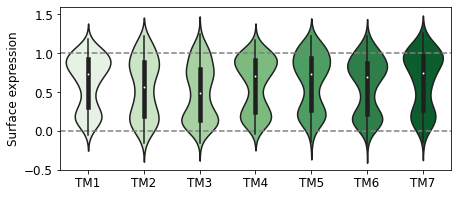

In [37]:
plt.figure(figsize=(7, 3))
plt.axhline(y = 1, linestyle='dashed', color='gray')
plt.axhline(y = 0, linestyle='dashed', color='gray')
plt.ylabel('Surface expression', fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.ylim(-0.5, 1.6)
sns.violinplot(data = detailed_topo_df, palette = 'Greens')
#plt.savefig('fig1/v2R_TMs_violin.png', dpi=300)

In [38]:
print (np.median(pd.Series(list(TM1_scores))))
print (np.median(pd.Series(list(TM2_scores))))
print (np.median(pd.Series(list(TM3_scores))))
print (np.median(pd.Series(list(TM4_scores))))
print (np.median(pd.Series(list(TM5_scores))))
print (np.median(pd.Series(list(TM6_scores))))
print (np.median(pd.Series(list(TM7_scores))))

0.7383648962408684
0.5622959454692169
0.4916769015489499
0.7118472774240017
0.7317166917953196
0.6981672890983034
0.7514563552386908


In [40]:
#these values were obtained by running the dG predictor on all 21mers (https://dgpred.cbr.su.se/index.php?p=home)
v2R_dG_preds = pd.read_excel('v2R_dGpreds.xlsx')


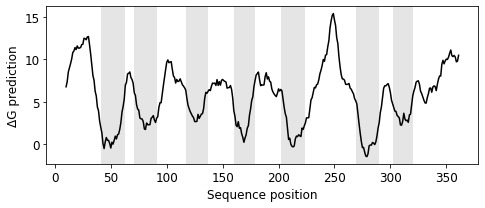

In [41]:
plt.figure(figsize=(7, 3))
plt.plot(v2R_dG_preds['Position'], v2R_dG_preds['dGpred'], color='k')
for xval_pair in [[41, 63], [71, 91], [117, 137], [160, 179], [202, 224], [269, 290], [302, 320]]:
    plt.axvspan(xval_pair[0], xval_pair[1], color='gray', alpha=0.2, lw=0)
    
plt.ylabel('ΔG prediction', fontsize=12)
plt.xlabel('Sequence position', fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()

In [42]:
scipy.stats.kruskal(detailed_topo_df['TM1'], \
                    detailed_topo_df['TM2'], \
                    detailed_topo_df['TM3'], \
                    detailed_topo_df['TM4'], \
                    detailed_topo_df['TM5'], \
                    detailed_topo_df['TM6'], \
                    detailed_topo_df['TM7'], \
                    nan_policy='omit')

KruskalResult(statistic=54.88095956518191, pvalue=4.89927119966443e-10)

In [43]:
validation_vars = [ 'L336S', 'L336R', 'L336G', 'Y205G', 'Y205D', 'P144V', 'P144H', 'V332Y', 'V332G', 'V332W']
validation_df = pd.DataFrame(index=validation_vars)

In [44]:
DMSO_indiv_scores = [1294,948,992,566,1383,2834,4193,2168,2650,2016]
validation_df['DMSO_indiv'] = DMSO_indiv_scores

In [45]:
DMSO_DMS_scores = []
DMSO_DMS_sems = []
for var in validation_df.index:
    DMSO_DMS_scores.append(v2R_df_over50_missense.loc[var]['ctrls_comb'])
    DMSO_DMS_sems.append(v2R_df_over50_missense.loc[var]['ctrls_sem'])
validation_df['DMSO_DMS_scores'] = DMSO_DMS_scores
validation_df['DMSO_DMS_sems'] = DMSO_DMS_sems


In [46]:
from scipy import stats
slope, intercept, r_value, p_value, std_err = stats.linregress(validation_df['DMSO_indiv'],validation_df['DMSO_DMS_scores'])

In [47]:
yfit = [intercept + slope * xi for xi in validation_df['DMSO_indiv']]

In [48]:
print (scipy.stats.pearsonr(validation_df['DMSO_indiv'],validation_df['DMSO_DMS_scores']))

(0.9497147647478565, 2.6320215612173175e-05)


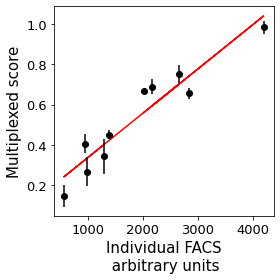

In [49]:
plt.figure(figsize=(4, 4))

plt.plot(validation_df['DMSO_indiv'], yfit, color='red')


plt.errorbar(validation_df['DMSO_indiv'], validation_df['DMSO_DMS_scores'], \
             marker='o', linestyle='None', color='k', \
            yerr=validation_df['DMSO_DMS_sems'], alpha=1)


plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.xlabel('Individual FACS\n arbitrary units', fontsize=15)
plt.ylabel('Multiplexed score', fontsize=15)
plt.tight_layout()